# 3c)

['__header__', '__version__', '__globals__', 'x_eval', 'x_train', 'y_eval', 'y_train']


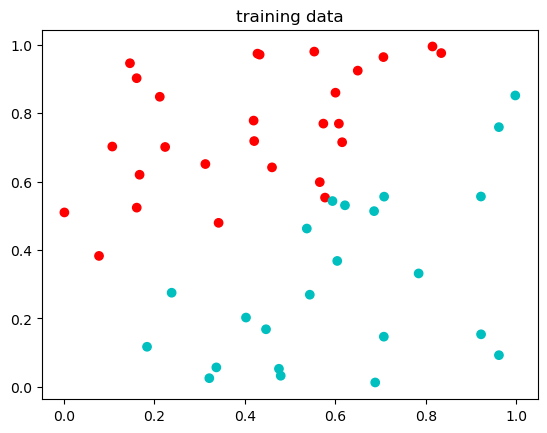

In [3]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 

in_data = loadmat('overfitting_data.mat')
print([key for key in in_data]) # -- use this line to see the keys in the dictionary data structure 

x_train = in_data['x_train']
x_eval = in_data['x_eval']
y_train = in_data['y_train']
y_eval = in_data['y_eval']
# print(y_eval)

n_eval = np.size(y_eval)
n_train = np.size(y_train)
# print(n_eval, n_train)

plt.scatter(x_train[:,0],x_train[:,1], color=['c' if i==-1 else 'r' for i in y_train[:,0]])
plt.title('training data')
plt.show()

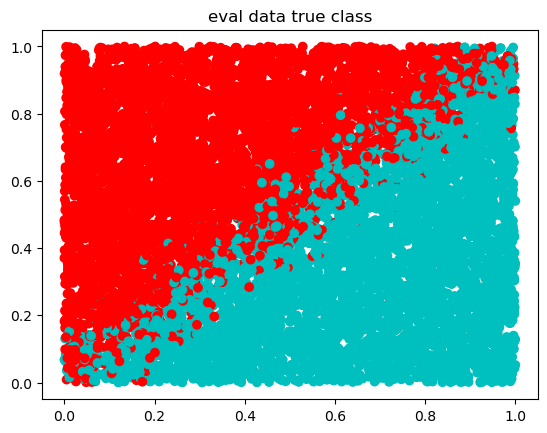

In [4]:
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==-1 else 'r' for i in y_eval[:,0]])
plt.title('eval data true class')
plt.show()

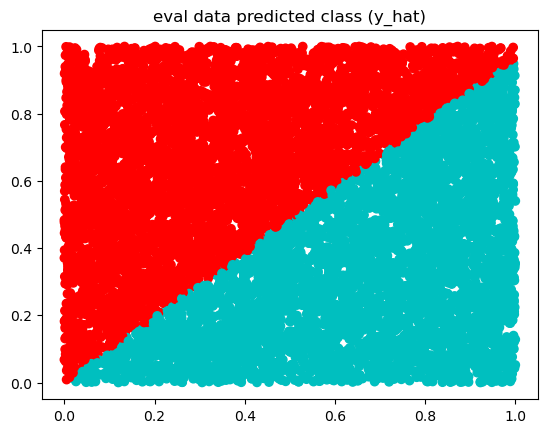

In [5]:
## Classifier 1 

# least squares as a loss function
# w = (X^T X)^(-1)X^T y
w_opt = np.linalg.inv(x_train.transpose()@x_train)@x_train.transpose()@y_train
y_hat = np.sign(x_eval@w_opt)

plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==-1 else 'r' for i in y_hat[:,0]])
plt.title('eval data predicted class (y_hat)')
plt.show()

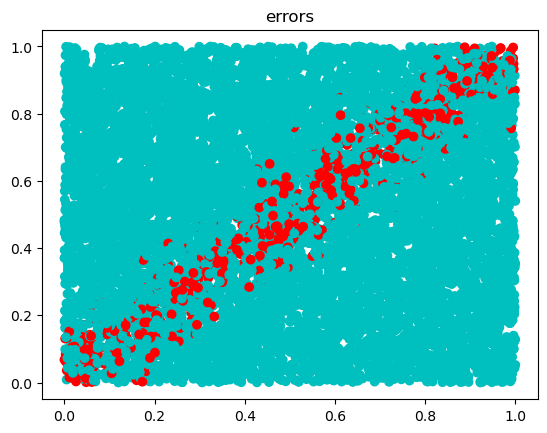

Errors: 759


In [6]:
error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat, y_eval))]
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==0 else 'r' for i in error_vec])
plt.title('errors')
plt.show()

print('Errors: '+ str(sum(error_vec))) # sum(): because when the prediction is an error, we get 1. Thus, sum all 1 can get the total error.
# print('Error Rate:' + str(100*sum(error_vec)/ n_eval) + '%')
# How many errors are there?
# --> 759.

# 3d)

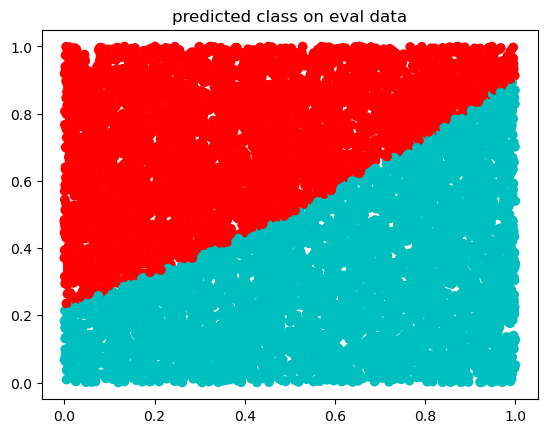

In [7]:
## Classifier 2
# Stack arrays in sequence horizontally (column wise).
# Return a new array of given shape and type, filled with ones.
x_train_2 = np.hstack((x_train**2, x_train, np.ones((n_train,1)) ))
x_eval_2 = np.hstack((x_eval**2, x_eval, np.ones((n_eval,1)) ))

# w = (X^T X)^(-1)X^T y 
w_opt_2 = np.linalg.inv(x_train_2.transpose()@x_train_2)@x_train_2.transpose()@y_train
y_hat_2 = np.sign(x_eval_2@w_opt_2)

plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==-1 else 'r' for i in y_hat_2[:,0]])
plt.title('predicted class on eval data')
plt.show()

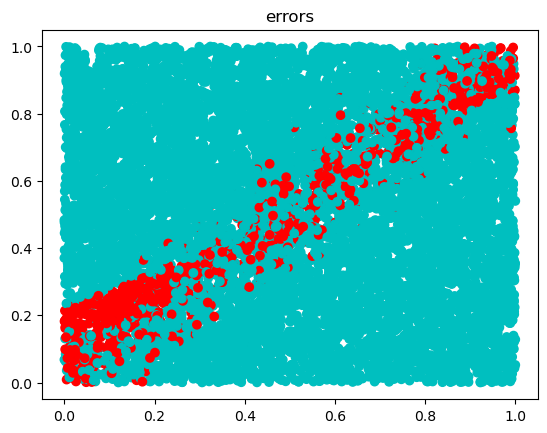

Error: 1066


In [9]:
error_vec_2 = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat_2, y_eval))]
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==0 else 'r' for i in error_vec_2])
plt.title('errors')
plt.show()

print('Error: '+ str(sum(error_vec_2)))
# print('Error Rate:' + str(100*sum(error_vec_2)/ n_eval) + '%')
# How many errors are there?
# --> 1066

# 3e)

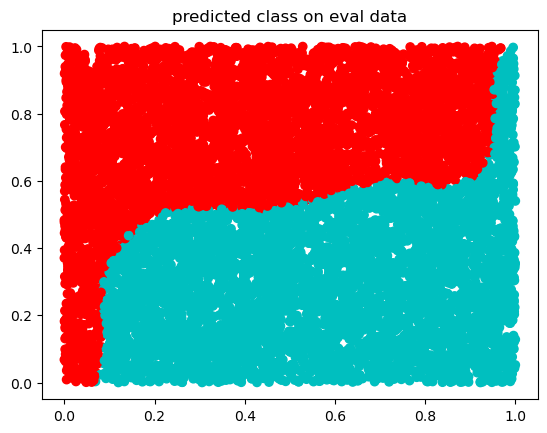

In [10]:
## Classifier 3
x_train_3 = np.hstack((x_train**6, x_train**5, x_train**4, x_train**3, x_train**2, x_train, np.ones((n_train,1)) ))
x_eval_3 = np.hstack((x_eval**6, x_eval**5, x_eval**4, x_eval**3, x_eval**2, x_eval, np.ones((n_eval,1)) ))

# w = (X^T X)^(-1)X^T y 
w_opt_3 = np.linalg.inv(x_train_3.transpose()@x_train_3)@x_train_3.transpose()@y_train
y_hat_3 = np.sign(x_eval_3@w_opt_3)

plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==-1 else 'r' for i in y_hat_3[:,0]])
plt.title('predicted class on eval data')
plt.show()

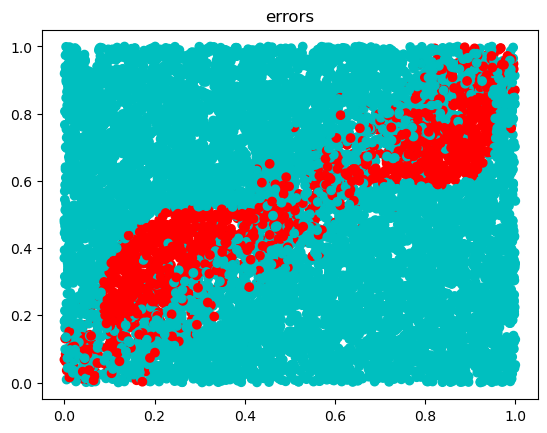

Error: 1677


In [11]:
error_vec_3 = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat_3, y_eval))]
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==0 else 'r' for i in error_vec_3])
plt.title('errors')
plt.show()

print('Error: '+ str(sum(error_vec_3)))
# print('Error Rate:' + str(100*sum(error_vec_2)/ n_eval) + '%')
# How many errors are there?
# --> 1677

# f) Of the three classifiers, which one performs worse? Why?
Classifiers3, the last one, because of overfitting.